In [36]:
%pylab inline
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [37]:
!python ../CM/orbit_cm.py MW1LMC4a1 0 51 LMCMCa1_orbit
#data/LMCMW/MW1LMC4/a0

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    

In [47]:
Nbody = loadtxt('../CM/LMCMCa1_orbit.txt')
A1_host = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a1_host.txt')
A1_sat = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a1_sat.txt')
A05_host = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a05_host.txt')
A05_sat = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a05_sat.txt')

In [48]:
Nbody_t = Nbody[:,0]
Nbody_R = Nbody[:,1]

# Making Nbody and Analytic times equal

t1 = A1_host[:,0] + 1.2 
t05 = A05_host[:,0] + 1.2

# Defining galactocentric distances and velocities
x1 = A1_host[:,1] - A1_sat[:,1]
y1 = A1_host[:,2] - A1_sat[:,2]
z1 = A1_host[:,3] - A1_sat[:,3]

vx1 = A1_host[:,4] - A1_sat[:,4]
vy1 = A1_host[:,5] - A1_sat[:,5]
vz1 = A1_host[:,6] - A1_sat[:,6]

x05 =  A05_host[:,1] - A05_sat[:,1]
y05 =  A05_host[:,2] - A05_sat[:,2]
z05 =  A05_host[:,3] - A05_sat[:,3]

vx05 =  A05_host[:,4] - A05_sat[:,4]
vy05 =  A05_host[:,5] - A05_sat[:,5]
vz05 =  A05_host[:,6] - A05_sat[:,6]

In [49]:
Rgal1 = np.sqrt(x1**2 + y1**2 + z1**2)
Rgal05 = np.sqrt(x05**2 + y05**2 + z05**2)
Vgal1 = np.sqrt(vx1**2 + vy1**2 + vz1**2)
Vgal05 = np.sqrt(vx05**2 + vy05**2 + vz05**2)

In [50]:
NB_t = Nbody[:,0]
NB_R = Nbody[:,1]
Xlmc = Nbody[:,2]
Ylmc = Nbody[:,3]
Zlmc = Nbody[:,4]
Xmw = Nbody[:,5]
Ymw = Nbody[:,6]
Zmw = Nbody[:,7]
NB_V = Nbody[:,8]
vXlmc = Nbody[:,9]
vYlmc = Nbody[:,10]
vZlmc = Nbody[:,11]
vXmw = Nbody[:,12]
vYmw = Nbody[:,13]
vZmw = Nbody[:,14]

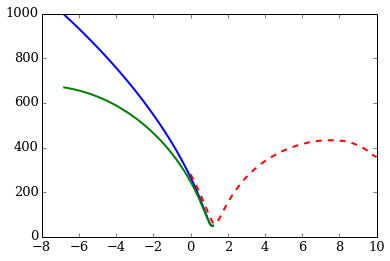

In [51]:
plot(t05, Rgal1, lw=2)
plot(t05, Rgal05, lw=2)
plot(NB_t, NB_R, lw=2, ls='--')

#xlim(0, 2)
#ylim(0, 400)

In [52]:
R2vir1 = where(Rgal1 >= 280)[0]
R2vir05 = where(Rgal05 >= 280)[0]
IC1 = R2vir1[0]
IC05 = R2vir05[0]
#print Nbody_t[index[0]]
print IC1, IC05

1283 1435


In [53]:
# Run with this ICs
print 'With full df:'
print x1[IC1], y1[IC1], z1[IC1]
print vx1[IC1], vy1[IC1], vz1[IC1]
print 
print 'With soften df:'
print x05[IC05], y05[IC05], z05[IC05]
print vx05[IC05], vy05[IC05], vz05[IC05]

With full df:
-43.490378 -261.472044 90.572333
20.21568 177.004835 5.972404

With soften df:
-41.975472 -266.550019 75.05848
14.204868 144.829729 21.979781


(0, 2)

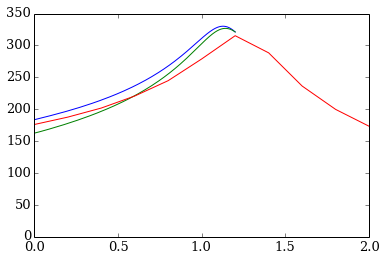

In [55]:
plot(t1, Vgal1)
plot(t05, Vgal05)
plot(NB_t, NB_V)
xlim(0,2)


In [56]:
print vXlmc[0], vYlmc[0], vZlmc[0] 
print vXmw[0], vYmw[0], vZmw[0] 

20.433062 176.607954 5.973104
1.665837 1.658913 -0.7332
